# Demonstration of applying machine learning in COVID related domain

Importing all essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset 

In [2]:

covid = pd.read_csv('Covid_Dataset.csv')

#Displaying dataset with top 5 columns
covid.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
#Dimensions of Data
covid.shape

(5434, 21)

In [4]:
#information about dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [5]:
#summary of the dataset
covid.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [6]:
#columns
covid.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [7]:
#to get the unique values from the data
covid.nunique()

Breathing Problem                          2
Fever                                      2
Dry Cough                                  2
Sore throat                                2
Running Nose                               2
Asthma                                     2
Chronic Lung Disease                       2
Headache                                   2
Heart Disease                              2
Diabetes                                   2
Hyper Tension                              2
Fatigue                                    2
Gastrointestinal                           2
Abroad travel                              2
Contact with COVID Patient                 2
Attended Large Gathering                   2
Visited Public Exposed Places              2
Family working in Public Exposed Places    2
Wearing Masks                              1
Sanitization from Market                   1
COVID-19                                   2
dtype: int64

All the features have uniques values as 'YES' and 'NO' i.e 1 for Yes and 0 for NO. 
only Wearing Masks and Sanitization from Market have only No as values.

Create a table to get the missing values

In [8]:

missing_values=covid.isnull().sum() # missing values

percent_missing = covid.isnull().sum()/covid.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


No Missing Values in the dataset.

# Explorartory data analysis.

<AxesSubplot:xlabel='COVID-19', ylabel='count'>

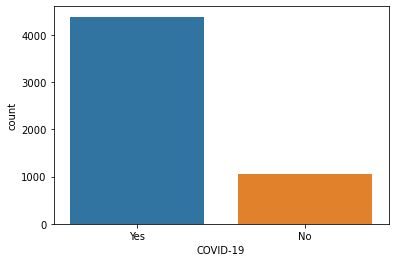

In [9]:
sns.countplot(x='COVID-19',data=covid)

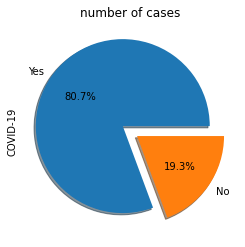

In [10]:

covid["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

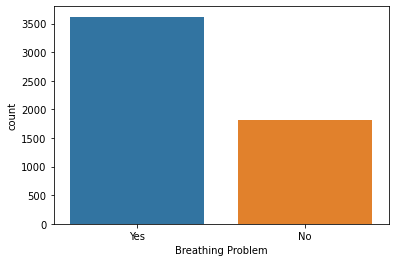

In [11]:
sns.countplot(x='Breathing Problem',data=covid)

<AxesSubplot:xlabel='Fever', ylabel='count'>

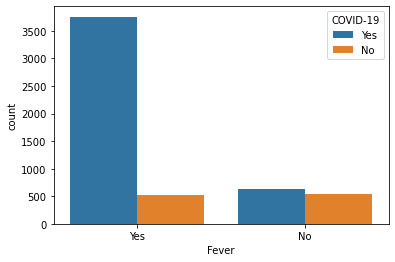

In [12]:
sns.countplot(x='Fever',hue='COVID-19',data=covid)

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

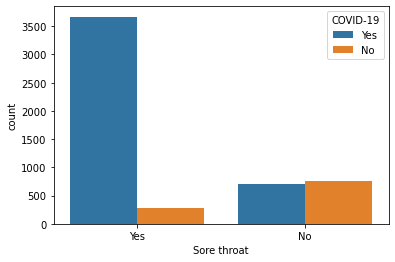

In [13]:
sns.countplot(x='Sore throat',hue='COVID-19',data=covid)

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

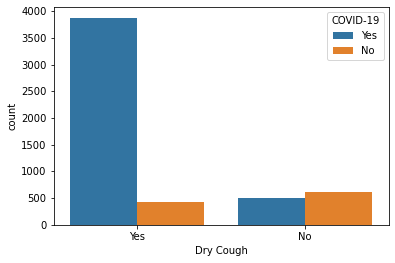

In [14]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=covid)

Visualizing the data

In [15]:
feat=['Running Nose','Asthma','Hyper Tension',
      'Abroad travel','Chronic Lung Disease',
      'Contact with COVID Patient','Attended Large Gathering','Visited Public Exposed Places',
      'Family working in Public Exposed Places']
list(enumerate(feat))


[(0, 'Running Nose'),
 (1, 'Asthma'),
 (2, 'Hyper Tension'),
 (3, 'Abroad travel'),
 (4, 'Chronic Lung Disease'),
 (5, 'Contact with COVID Patient'),
 (6, 'Attended Large Gathering'),
 (7, 'Visited Public Exposed Places'),
 (8, 'Family working in Public Exposed Places')]

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

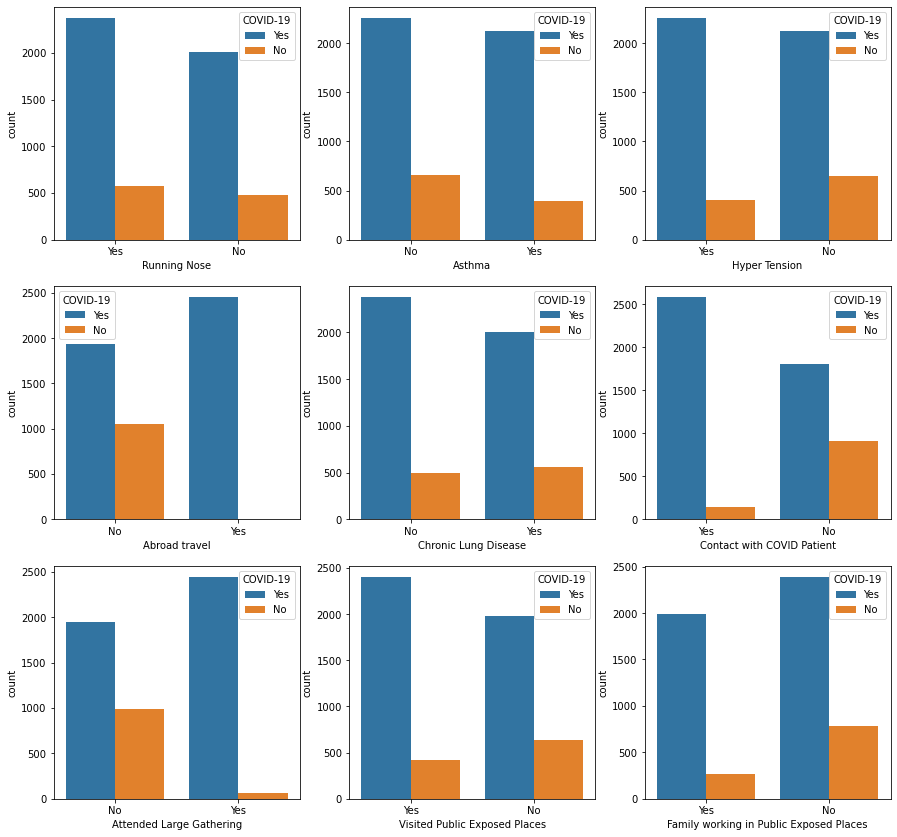

In [16]:

plt.figure(figsize=(15,30))
for i in enumerate(feat):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],hue='COVID-19',data=covid)

# Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [18]:
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])

In [19]:
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [20]:
covid.dtypes.value_counts()

int32    19
int64     2
dtype: int64

In [21]:
covid.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [22]:
#Checking null values
covid.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

<AxesSubplot:>

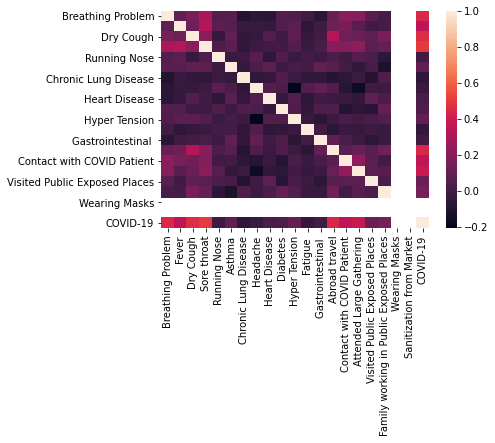

In [23]:
sns.heatmap(covid.corr())

# Splitting Data into Training and Testing set

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [25]:
x=covid.drop('COVID-19',axis=1)
y=covid['COVID-19']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [27]:
print("x_train size rows and columns :",x_train.shape)
print("x_test size rows and columns :",x_test.shape)
print("x_train size rows and columns :",y_train.shape)
print("x_test size rows and columns :",y_test.shape)


x_train size rows and columns : (4347, 20)
x_test size rows and columns : (1087, 20)
x_train size rows and columns : (4347,)
x_test size rows and columns : (1087,)


In [28]:
x_train

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
962,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,0,0
2963,1,1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,0
632,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0
4429,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0
467,1,1,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3461,1,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0
2419,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0
3240,1,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0


In [29]:
x_test

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
4855,0,0,1,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0
3408,1,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0
4245,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0
1338,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0
1896,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0
1154,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,0
1622,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0
2236,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0


In [30]:
y_train

962     1
2963    1
632     1
4429    0
467     1
       ..
4953    0
3461    1
2419    1
3240    1
5011    0
Name: COVID-19, Length: 4347, dtype: int32

In [31]:
y_test

4855    0
3408    1
4245    0
1338    1
1896    1
       ..
1927    1
1154    1
1622    1
2236    1
1711    1
Name: COVID-19, Length: 1087, dtype: int32


# MODELLING

# Logistic Regression

In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Score/Accuracy
acc_logreg=model.score(x_test, y_test)*100
print('Accuracy of the model :',acc_logreg)
logreg_confusion=metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion matrix\n:',logreg_confusion)

Accuracy of the model : 96.41214351425943

Confusion matrix
: [[196  22]
 [ 17 852]]


# K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#Score/Accuracy
acc_knn=knn.score(x_test, y_test)*100
print('Accuracy of the model :',acc_knn)
knn_confusion=metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion matrix\n:',knn_confusion)

Accuracy of the model : 96.41214351425943

Confusion matrix
: [[200  18]
 [ 21 848]]


# Decision Tree

In [34]:
from sklearn import tree
t = tree.DecisionTreeClassifier()
t.fit(x_train,y_train)
y_pred = t.predict(x_test)
#Score/Accuracy
acc_dt=t.score(x_test, y_test)*100
print('Accuracy of the model :',acc_dt)
dt_confusion=metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion matrix\n:',dt_confusion)

Accuracy of the model : 97.88408463661453

Confusion matrix
: [[207  11]
 [ 12 857]]


# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
#Score/Accuracy
acc_gnb= model.score(x_test, y_test)*100
print('Accuracy of the model :',acc_gnb)
gnb_confusion=metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion matrix\n:',gnb_confusion)

Accuracy of the model : 73.04507819687213

Confusion matrix
: [[207  11]
 [ 12 857]]


In [36]:
# Confusion Matrix

Class_R=metrics.classification_report(y_test,y_pred)
print('\n Classification report:\n',Class_R)


 Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       218
           1       0.99      0.99      0.99       869

    accuracy                           0.98      1087
   macro avg       0.97      0.97      0.97      1087
weighted avg       0.98      0.98      0.98      1087



Creating a table for model evaluation

In [37]:
models = pd.DataFrame({
    'Model': [ 'K-NearestNeighbor', 'Logistic Regression', 'Naive Bayes',   
              'Decision Tree' ],
    'Score': [acc_knn, acc_logreg, acc_gnb, acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,97.884085
0,K-NearestNeighbor,96.412144
1,Logistic Regression,96.412144
2,Naive Bayes,73.045078


we have got the best accuracy for Decision Tree model followed by K Nearest Neighbors, Logistic Reggression and least accuracy with  an Naive bayes.
Here the model gives best accuracy is classification model. Because the problem statement for this dataset is to predict whether the patient comes out to be Covid positive or Negative.

Decision tree is the best suited model with the highest of accuracy amongst all the model classification applied on the
problem statement of this dataset.